# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [46]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')

num_train = data_train.shape[0]
num_test = data_test.shape[0]

x_train    = np.zeros(num_train)
y_train   = np.zeros(num_train)
label_train = np.zeros(num_train)

x_test    = np.zeros(num_test)
y_test    = np.zeros(num_test)
label_test = np.zeros(num_test)

for i in range(num_train):
    x_train[i]    = data_train[i,0]
    y_train[i]    = data_train[i,1]
    label_train[i] = data_train[i,2]

for j in range(num_test):
    x_test[j]    = data_test[j,0]
    y_test[j]    = data_test[j,1]
    label_test[j] = data_test[j,2]

## plot the data

In [47]:
def ex_plot_data(x, y, l):
    
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
   
    plt.title('data')
    
    xblue = [x[i] for i in range(0, x.size) if l[i]==0]
    xred = [x[i] for i in range(0, x.size) if l[i]==1]
    yblue = [y[i] for i in range(0, x.size) if l[i]==0]
    yred = [y[i] for i in range(0, x.size) if l[i]==1]
    
    plt.plot(xblue, yblue, '.', color = 'blue')
    plt.plot(xred, yred, '.', color = 'red')

    plt.axis('equal')
    plt.tight_layout()
    plt.show()

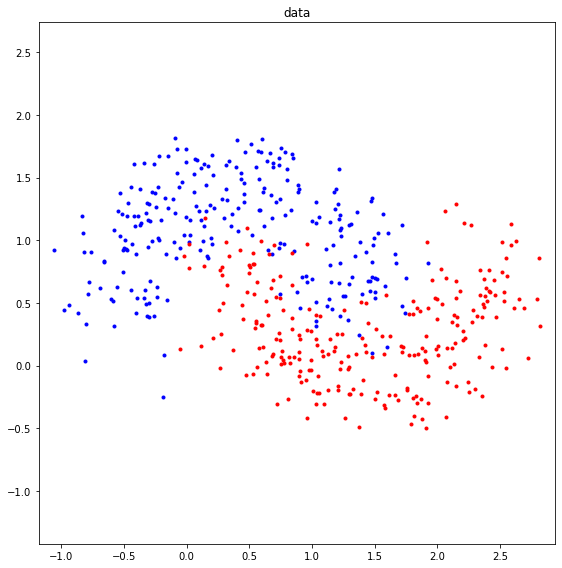

In [48]:
ex_plot_data(x_train, y_train, label_train)

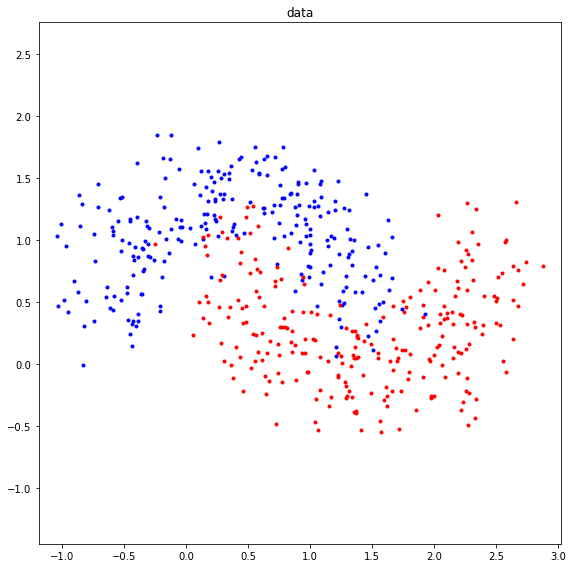

In [49]:
ex_plot_data(x_test, y_test, label_test)

## define feature function

In [50]:
def feature_function(x, y):
    
    n = x.size
    one = np.ones(shape=(n, ))
    feature = np.column_stack((one,x**3,x**2,-x**2,np.cos(x),np.tanh(x),y))
    
    return feature

## define regression function based on the feature function

In [51]:
def regression_function(theta, feature):
    
    value = np.dot(feature, theta)
    
    return value

## define regularization function on the model parameters

In [52]:
def regularization_function(theta):
    
    n = theta.shape[0]
    value = 0
    
    for i in range(n):
        value += np.power(theta[i],2)
        
    return value

## define sigmoid function

In [53]:
def logistic_function(x):
    
    z = 1 / (1 + np.exp(-x))
    
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [54]:
def compute_loss_feature(theta, feature, label, alpha):
    
    n = feature.shape[0]
    
    h = logistic_function(regression_function(theta, feature))
    
    resi = (-label*np.log(h)) - ((1-label)*np.log(1 - h))
    
    loss = np.sum(resi+(alpha /2) * regularization_function(theta)) / n
    
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [55]:
def compute_gradient_feature(theta, feature, label, alpha):
       
    n = feature.shape[0]
    
    h = logistic_function(regression_function(theta, feature))
    
    gradient = feature.T@(h-label)
        
    gradient = (gradient + (alpha * theta)) / n
    
    return gradient

## compute the accuracy

In [56]:
def compute_accuracy(theta, feature, label):
    
    check = 0
    
    n = label.shape[0]
    for i in range(n):
        f = regression_function(theta, feature[i, :])
        logistic_f = logistic_function(f)
        
        if logistic_f >= 0.5 and label[i]==1:
            check += 1
        elif logistic_f < 0.5 and label[i]==0:
            check += 1
        else:
            pass
        
    accuracy = check / n
    
    return accuracy

## gradient descent for the model parameters $\theta$

In [57]:
num_iteration   = 30000  
learning_rate   = 0.3
alpha           = 0
theta           = np.array((0,0,0,0,0,0,0))

feature_train = feature_function(x_train, y_train)
feature_test  = feature_function(x_test, y_test)

In [58]:
theta_iteration             = np.zeros((num_iteration, theta.size))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [59]:
for i in range(num_iteration):
    theta = theta - learning_rate * compute_gradient_feature(theta,feature_train,label_train,alpha)
    loss_train = compute_loss_feature(theta, feature_train, label_train, alpha)
    accuracy_train = compute_accuracy(theta, feature_train, label_train)
    loss_test = compute_loss_feature(theta, feature_test, label_test, alpha)
    accuracy_test = compute_accuracy(theta, feature_test, label_test)
    
    theta_iteration[i]= theta
    loss_iteration_train[i] = loss_train
    accuracy_iteration_train[i] = accuracy_train
    loss_iteration_test[i] = loss_test
    accuracy_iteration_test[i] = accuracy_test

theta_optimal = theta_iteration[num_iteration-1]

<ipython-input-54-ca4860648f85>:7: RuntimeWarning: divide by zero encountered in log
  resi = (-label*np.log(h)) - ((1-label)*np.log(1 - h))
<ipython-input-54-ca4860648f85>:7: RuntimeWarning: invalid value encountered in multiply
  resi = (-label*np.log(h)) - ((1-label)*np.log(1 - h))


## compute accuracy of the classifiers

In [60]:
accuracy_train  = compute_accuracy(theta_optimal, feature_train, label_train)
accuracy_test   = compute_accuracy(theta_optimal, feature_test, label_test)

## plot the results

In [61]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    
    plt.plot(loss_iteration_train, '-', color = 'red')
    plt.plot(loss_iteration_test, '-', color = 'blue')
    
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [62]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('accuracy')
    
    plt.plot(accuracy_iteration_train, '-', color = 'red')
    plt.plot(accuracy_iteration_test, '-', color = 'blue')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [63]:
def plot_data(data_train, data_test):
    
    f = plt.figure(figsize=(16,8))   
    
    f_train = f.add_subplot(1,2,1)
    f_test = f.add_subplot(1,2,2)
    
    for i in range(data_train.shape[0]):
        if data_train[i,2] == 0:
            f_train.plot(data_train[i,0], data_train[i, 1], '.', color = 'blue')
        elif data_train[i,2] == 1:
            f_train.plot(data_train[i,0], data_train[i, 1], '.', color = 'red')
    
    for i in range(data_test.shape[0]):
        if data_test[i,2] == 0:
            f_test.plot(data_test[i,0], data_test[i, 1], '.', color = 'blue')
        elif data_test[i,2] == 1:
            f_test.plot(data_test[i,0], data_test[i, 1], '.', color = 'red')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [64]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
   
    plt.title('model parameter')
    
    n = theta_iteration.shape[1]
    
    for i in range(n):
        plt.plot(theta_iteration[:,i], '-', label = r"$\theta_{}$".format(i))
    
    plt.xlabel('iteration')
    plt.legend()
    plt.tight_layout()
    plt.show()

No handles with labels found to put in legend.


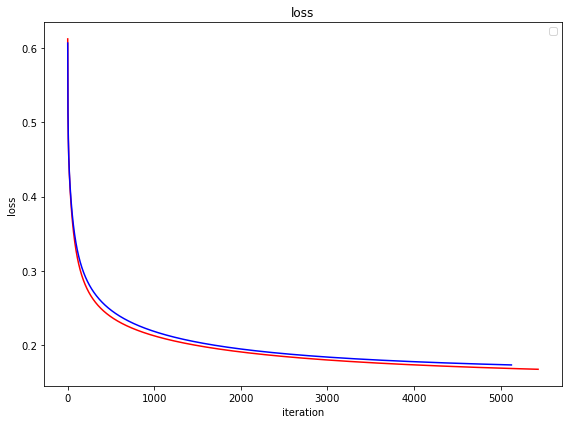

In [65]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

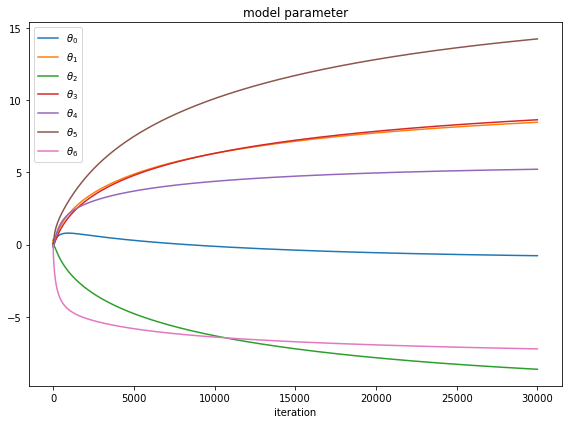

In [66]:
plot_model_parameter(theta_iteration)

In [68]:
grid_x = np.linspace(-1.5, 3, 1000)
grid_y = np.linspace(-2, 3, 1000)
XX, YY = np.meshgrid(grid_x, grid_y)
    
ZZ= theta[0] + theta[1] * XX**3 + theta[2] * XX**2 - theta[3] * XX**2 + theta[4]*np.cos(XX) + theta[5]*np.tanh(XX)+theta[6]*YY

def plot_classifier(data, theta):

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('training data')
    
    for i in range(data.shape[0]):
        if data[i,2] == 0:
            plt.plot(data[i,0], data[i,1], '.', color='blue')
        elif data[i,2] == 1:
            plt.plot(data[i,0], data[i,1], '.', color='red')
            
    plt.scatter(XX, YY, c=ZZ, cmap = 'coolwarm')
    plt.colorbar()
    
    plt.contour(XX, YY, ZZ, levels=0, colors='black')

    plt.axis('equal')
    plt.tight_layout()
    plt.show()

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

No handles with labels found to put in legend.


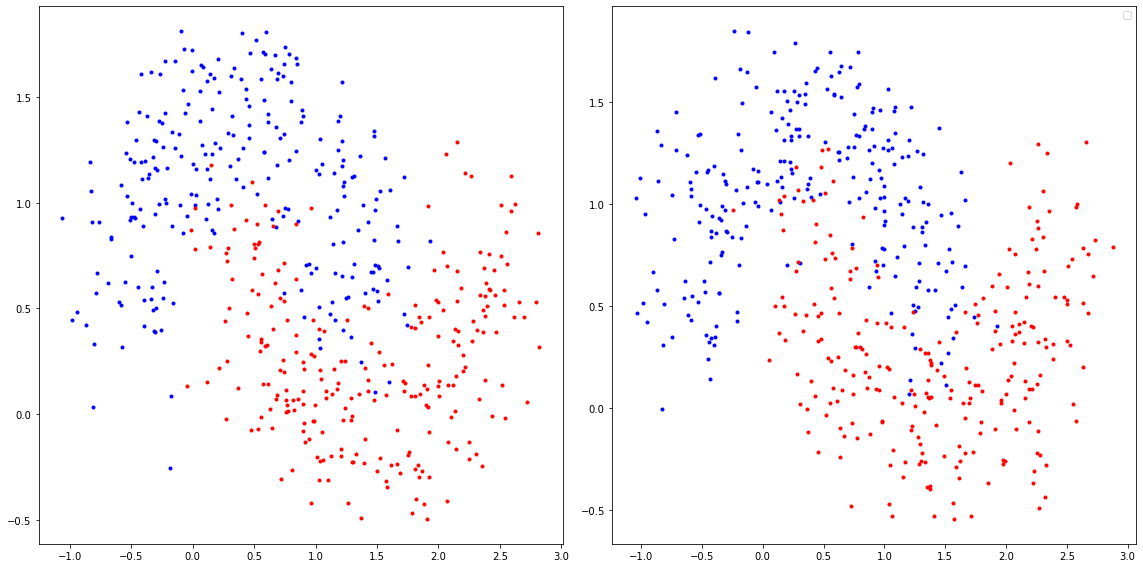

In [69]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

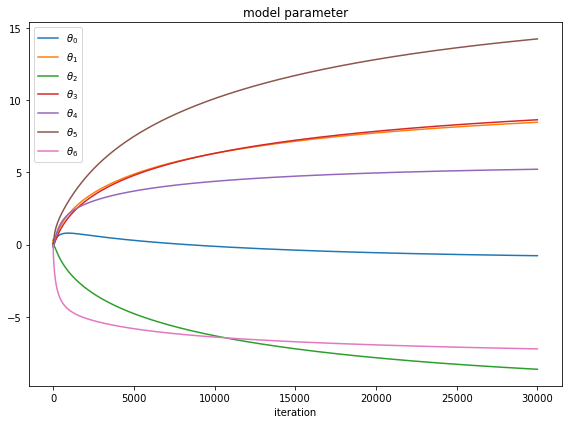

In [70]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

No handles with labels found to put in legend.


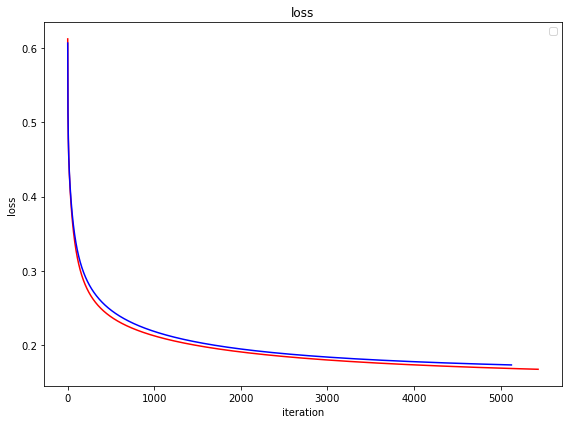

In [71]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

No handles with labels found to put in legend.


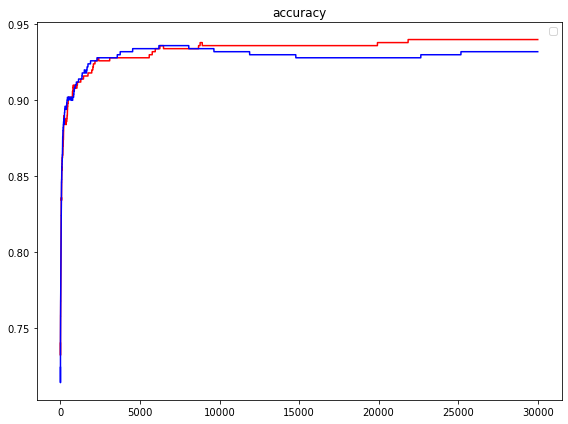

In [72]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

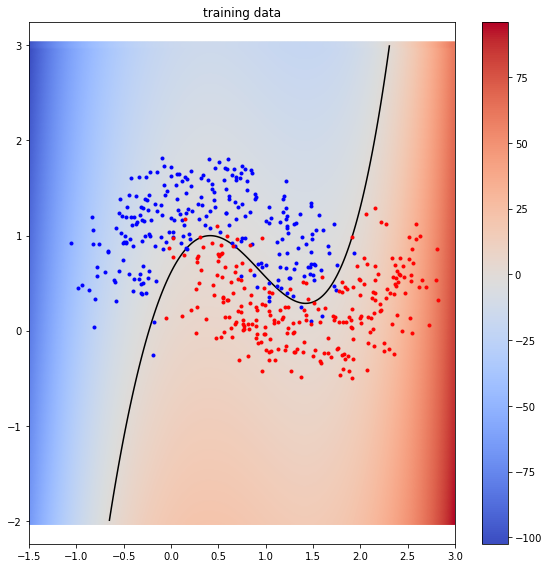

In [73]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

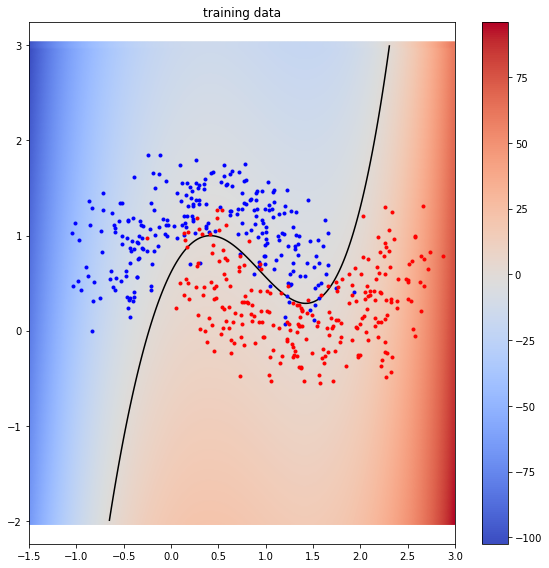

In [74]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [75]:
print('accuract(train): {:.5f}'.format(accuracy_train))
print('accuracy(test) : {:.5f}'.format(accuracy_test))

accuract(train): 0.94000
accuracy(test) : 0.93200
